**Import Libraries**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam

**Load Dataset**

In [3]:
data = load_breast_cancer()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

**Feature Scaling**

In [4]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Build Neural Network with Dropout**

In [5]:
model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']

)

**Train Model**

In [6]:
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    verbose=0
)

**Standard Prediction**

In [7]:
y_pred = (model.predict(X_test) > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred)

print("Test Accuracy:", accuracy)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step 
Test Accuracy: 0.9736842105263158


**Monte Carlo Dropout function**

In [8]:
def mc_dropout_prediction(model, X, n_samples=100):
    predictions = []

    for i in range(n_samples):
        preds = model(X, training=True)  # Dropout ACTIVE
        predictions.append(preds.numpy())

    return np.array(predictions)

**Run Monte Carlo Sampling**

In [9]:
mc_preds = mc_dropout_prediction(model, X_test, n_samples=100)

mean_prediction = mc_preds.mean(axis=0).flatten()
uncertainty = mc_preds.var(axis=0).flatten()


**Accuracy using Mean Prediction**

In [10]:
final_preds = (mean_prediction > 0.5).astype(int)
mc_accuracy = accuracy_score(y_test, final_preds)

print("MC Dropout Accuracy:", mc_accuracy)

MC Dropout Accuracy: 0.9736842105263158


**Plot Uncertainty Distribution**

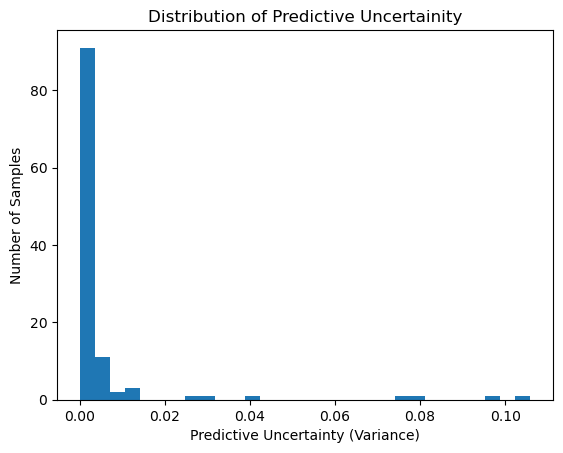

In [14]:
plt.figure()
plt.hist(uncertainty, bins=30)
plt.xlabel("Predictive Uncertainty (Variance)")
plt.ylabel("Number of Samples")
plt.title("Distribution of Predictive Uncertainity")
plt.show()

**Correct vs Incorrect Predictions**

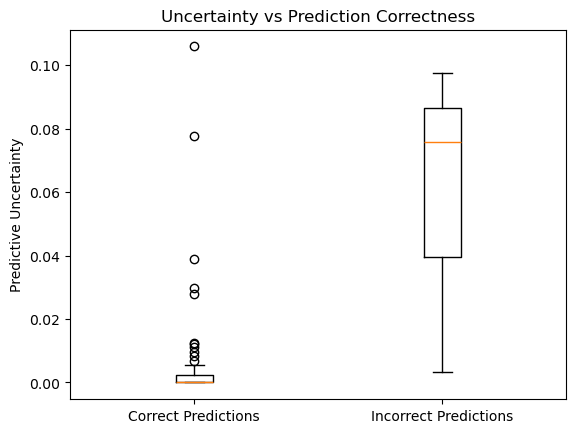

In [16]:
correct = final_preds == y_test

plt.figure()
plt.boxplot(
    [uncertainty[correct], uncertainty[~correct]],
    tick_labels=["Correct Predictions", "Incorrect Predictions"]

)

plt.ylabel("Predictive Uncertainty")
plt.title("Uncertainty vs Prediction Correctness")
plt.show()